# Optimization Methods: Assignment 3

---

## Part 2: Programming problems

In [3]:
import math
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## Problem 1: Bell curve fitting

In this exercise we will use a dataset of 100 points with 2 coordinates: $z^{(i)}, y^{(i)}$, with $i = 1, ..., N$ and $z, y ∈ R$.

The dataset consists of two columns:
- The first column represents the input values, denoted as $z$.
- The second column represents the observed values, denoted as $y$.

Given the shape of this point cloud, we will try to fit a bell curve to it, which is defined as:

$$ m(z; x) = \exp\left(-\frac{(z - x_1)^2}{x_2}\right) $$

where $ x = (x_1, x_2) $ is a vector of 2 unknown parameters that we want to find. This model is called a bell curve because of its shape.

- $ x_1 $ is the center of the bell curve.
- $ x_2 $ is related to the width of the curve (in fact, we need $ x_2 > 0 $, but for now, we can ignore this constraint).

To find the bell curve that best fits the data, we will find the parameters $ x $ that minimize the mean squared error:

$$ f(x) = \frac{1}{N} \sum_{i=1}^{N} (m(z^{(i)}; x) - y^{(i)})^2 $$

That is, we will solve the optimization problem:

$$ \min_{x \in \mathbb{R}^2} f(x). $$

This function tells us how well a given set of parameters*$x = (x_1, x_2)$ fits the dataset. Our goal is to minimize this function.

### 1. Import the Dataset

First of all, let's import the file `dataset1.csv` and store its content into a `numpy` `nd.array`. This file is a table containing 100 rows and 2 columns, representing 100 data points with 2 coordinates.

**Hint**: Import this table with `numpy` (already imported all the libraries above) into an array using:

```python
import numpy as np
data = np.loadtxt("dataset1.csv", skiprows=2, delimiter=",")

In [4]:
dataset1 = np.loadtxt("dataset1.csv", skiprows=2, delimiter=",")

#### 2. Plot this point cloud as in figure 1

With the first column on the x-axis and the second column one the y-axis.

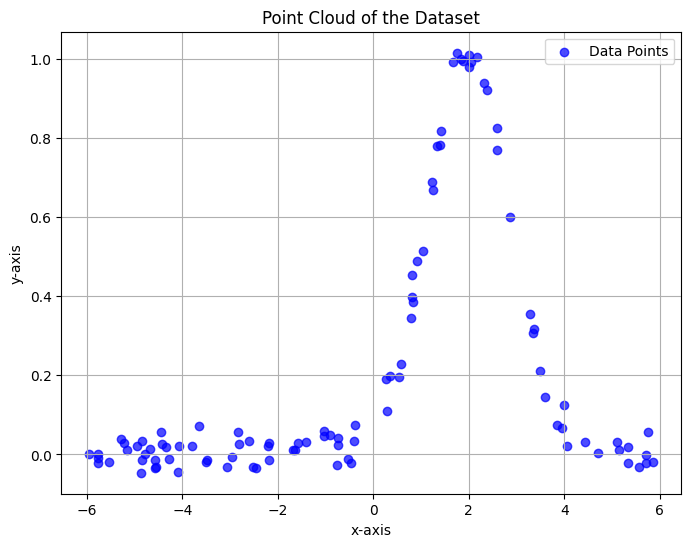

In [5]:
x = dataset1[:, 0]
y = dataset1[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='b', marker='o', alpha=0.7, label="Data Points")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Point Cloud of the Dataset")
plt.legend()
plt.grid(True)
plt.show()

### 3. Write a function that computes $f(x)$ defined above for any given $x = (x1, x2)$

This function must also take as argument the array containing the data points. Evaluate $f$ at $x = (1, 0.5)$ and $x = (0.5,1)$.

In [6]:
def compute_f(x, dataset):
    x1, x2 = x
    z = dataset[:, 0]
    y = dataset[:, 1]

    # Compute the bell curve function m(z; x)
    predictions = np.exp(-((z - x1) ** 2) / x2)

    # Compute the mean squared error
    return np.mean((predictions - y) ** 2)

# Evaluate f at the given points
f_x1 = compute_f((1, 0.5), dataset1)
f_x2 = compute_f((0.5, 1), dataset1)

print(f"f(1, 0.5) = {f_x1}")
print(f"f(0.5, 1) = {f_x2}")


f(1, 0.5) = 0.11204289613814822
f(0.5, 1) = 0.15009253657239355


### 4. Show the gradient of $f(x)$ (MSE, the function that we want to minimize)

We are given the function of the MSE:

$$ f(x) = \frac{1}{N} \sum_{i=1}^{N} (m(z^{(i)}; x) - y^{(i)})^2 $$

where $m$ is the bell curve function:

$$ m(z; x) = \exp\left(-\frac{(z - x_1)^2}{x_2}\right) $$

To minimize $ f(x) $, we first compute its gradient:

$$ \nabla f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} \right) $$

#### Partial derivative with respect to $ x_1 $

1. Using the chain rule:

$$
\frac{\partial}{\partial x_1} \left( (m(z^{(i)}; x) - y^{(i)})^2 \right) = 2 (m(z^{(i)}; x) - y^{(i)}) \frac{\partial m}{\partial x_1}
$$

2. Compute $ \frac{\partial m}{\partial x_1} $, since we are dealing with an exponential function, we use the chain rule again $\frac{d}{dx_1} e^{f(x_1)} = e^{f(x_1)} \cdot f'(x_1)$:

$$
\frac{\partial m}{\partial x_1} = \left(\frac{2(z^{(i)} - x_1)}{x_2} \right) m(z^{(i)}; x)
$$

3. Summing all $ N $ points and calculating the mean (basically rewriting the $\frac{1}{N}$ and the summation):

$$
\frac{\partial f}{\partial x_1} = \frac{2}{N} \sum_{i=1}^{N} \frac{(z^{(i)} - x_1)}{x_2} m(z^{(i)}; x) (m(z^{(i)}; x) - y^{(i)})
$$

#### Partial derivative with respect to $ x_2 $

Similarly, we can differentiate with respect to $ x_2 $:

1. The first part is the same thing, so let's compute $ \frac{\partial m}{\partial x_2} $:

$$
\frac{\partial m}{\partial x_2} = \left( \frac{(z^{(i)} - x_1)^2}{x_2^2} \right) m(z^{(i)}; x)
$$

(The derivative of $\frac{1}{x_2}$ is $-\frac{1}{x_2^2}$, and it makes the negative sign positive.)

2. Again, summing all $ N $ points and calculating the mean

$$
\frac{\partial f}{\partial x_2} = \frac{2}{N} \sum_{i=1}^{N} \left( \frac{(z^{(i)} - x_1)^2}{x_2^2} \right) m(z^{(i)}; x) (m(z^{(i)}; x) - y^{(i)})
$$

In conclusion, the gradient is:

$$
\nabla f(x) =
\begin{bmatrix}
\frac{2}{N} \sum\limits_{i=1}^{N} \frac{(z^{(i)} - x_1)}{x_2} m(z^{(i)}; x) (m(z^{(i)}; x) - y^{(i)}) \\
\frac{2}{N} \sum\limits_{i=1}^{N} \left( \frac{(z^{(i)} - x_1)^2}{x_2^2} \right) m(z^{(i)}; x) (m(z^{(i)}; x) - y^{(i)})
\end{bmatrix}
$$

This gradient will be used in the gradient descent to find the best parameters $ (x_1, x_2) $.

### 5. Write a function that computes the gradient of $f$ for any given $x$ and evaluate $∇f$ at $x = (1, 0.5)$ and $x = (0.5,1)$.

In [7]:
# Model function m(z; x) = exp(-((z - x_1)^2) / x_2)
def model(z, x):
    return np.exp(-((z - x[0])**2) / x[1])

def gradient(x, z, y):
    N = len(z)      # Number of data points in the dataset
    grad_x1 = 0     # Gradient with respect to x1
    grad_x2 = 0     # Gradient with respect to x2
    
    # Summation
    for i in range(N):
        m_value = model(z[i], x)  # Compute m(z^{(i)}; x)
        error = m_value - y[i]    # Compute m(z^{(i)}; x) - y^{(i)}

        grad_x1 += (z[i] - x[0]) / x[1] * m_value * error
        grad_x2 += ((z[i] - x[0])**2) / (x[1]**2) * m_value * error
    
    # Scale the gradients by 2/N, for the MSE
    grad_x1 *= 2 / N
    grad_x2 *= 2 / N
    
    return np.array([grad_x1, grad_x2])

# Extract z and y values from the dataset
z = dataset1[:, 0]
y = dataset1[:, 1]

# I will call both evaluation points "x", to avoid confusion with x1 = x[0] and x2 = x[1] in the calculations

# Evaluate the gradient at x = (1, 0.5)
x = np.array([1, 0.5])
grad_x = gradient(x, z, y)
print(f"Gradient at x = (1, 0.5): {grad_x}")

# Evaluate the gradient at x = (0.5, 1)
x = np.array([0.5, 1])
grad_x = gradient(x, z, y)
print(f"Gradient at x = (0.5, 1): {grad_x}")

Gradient at x = (1, 0.5): [-0.07611275 -0.0578975 ]
Gradient at x = (0.5, 1): [-0.04620092 -0.02646519]


### 6. Write a function implementing the Gradient Descent algorithm

You can decide which arguments this function, but this function should also work the same on another data set (i.e., if someone provides another array containing another set of data points).

Moreover, at each iteration $k$, you should print the value of $x(k)$, $f(x(k))$ and $∥∇f(x(k))∥$.

From the last assignment we recall that the Gradient Descent is an iterative optimization algorithm used to minimize a function $f(x)$. The update rule is:

$$
x^{(k+1)} = x^{(k)} - \alpha \nabla f(x^{(k)})
$$

where:

- $x^{(k)}$ is the current point.
- $\alpha$ is the step size (learning rate), controlling how big is the step that we take.
- $\nabla f(x)$ is the gradient, indicating the direction of the steepest ascent.
- We move in the opposite direction of the gradient to minimize the function.

Stop if the gradient norm is smaller than a tolerance $\epsilon$: $||\nabla f(x)|| < \epsilon$. This means we are close enough to the minimum. Also stop if we reach the maximum number of iterations.

In [8]:
def gradient_descent(gradient, alpha, x_start, z, y, max_iter=10000, epsilon=1e-6):
    x = np.array(x_start, dtype=float)
    iterates = [x.copy()]

    for k in range(max_iter):
        grad = gradient(x, z, y)                    # Compute gradient
        grad_norm = np.linalg.norm(grad)            # Compute gradient norm
        f_value = np.mean((model(z, x) - y) ** 2)   # Compute function value

        print(f"Iteration {k}: x = {x}, f(x) = {f_value:.6f}, ||∇f(x)|| = {grad_norm:.6f}")

        if grad_norm < epsilon:
            break

        x = x - alpha * grad                # Gradient descent update
        iterates.append(x.copy())

    return iterates

### 7. Test this algorithm for a step size $α ∈ {0.1, 1, 10, 100}$ starting from $x(0) = (2,5)$ and reports the results

Test also different starting points and comment (Remark: you need to choose $x^{(0)}_2 > 0$).

In [9]:
# Load dataset 1
z = dataset1[:, 0]
y = dataset1[:, 1]

# Run gradient descent with x_0 = (2, 5), alpha = 0.1, 1, 10, 100
x_start = np.array([2, 5])
alpha = 0.1
iterates = gradient_descent(gradient, alpha, x_start, z, y)

print(f"Final solution: {iterates[-1]}")
print(f"Number of iterations: {len(iterates)}")

Iteration 0: x = [2. 5.], f(x) = 0.040376, ||∇f(x)|| = 0.014777
Iteration 1: x = [2.00057947 4.99864062], f(x) = 0.040351, ||∇f(x)|| = 0.014767
Iteration 2: x = [2.00115645 4.99728126], f(x) = 0.040326, ||∇f(x)|| = 0.014758
Iteration 3: x = [2.00173095 4.99592192], f(x) = 0.040301, ||∇f(x)|| = 0.014748
Iteration 4: x = [2.00230298 4.9945626 ], f(x) = 0.040276, ||∇f(x)|| = 0.014738
Iteration 5: x = [2.00287254 4.9932033 ], f(x) = 0.040251, ||∇f(x)|| = 0.014728
Iteration 6: x = [2.00343965 4.99184402], f(x) = 0.040226, ||∇f(x)|| = 0.014719
Iteration 7: x = [2.00400431 4.99048476], f(x) = 0.040201, ||∇f(x)|| = 0.014709
Iteration 8: x = [2.00456654 4.98912552], f(x) = 0.040177, ||∇f(x)|| = 0.014700
Iteration 9: x = [2.00512634 4.98776631], f(x) = 0.040152, ||∇f(x)|| = 0.014690
Iteration 10: x = [2.00568371 4.98640712], f(x) = 0.040127, ||∇f(x)|| = 0.014681
Iteration 11: x = [2.00623868 4.98504795], f(x) = 0.040103, ||∇f(x)|| = 0.014672
Iteration 12: x = [2.00679124 4.98368881], f(x) = 0.04

We can see a lot of interesting results:

- With $α = 0.1$ the algorithm converges slowly, since it requires 7312 iterations to $x = [1.99572858, 1.50651755]$
- With $α = 1$ the algorithm converges in 720 iterations to $x = [1.99572856, 1.50651737]$
- With $α = 10$ the algorithm converges in 70 iterations to $x = [1.99572772, 1.50651016]$
- With $α = 100$ the algorithm converges in 2031 to a wrong result $x = [9.41341795, 1.91434406]$, since the step is too big and it can't reach the exact minimizer point

I believe we can conclude that the true minimizer point is $x = [1.995, 1.506]$.

I also tried to start with a different points of $x^{(0)}$. Obviously, the further the starting point is from the optimal solution, the slower it will converge.

- With $x^{(0)} = (2, 1)$ (a very close point) it converges to the correct solution in just 23 iterations with $α = 10$, but obviously doesn't work with $α = 100$
- With $x^{(0)} = (5, 8)$ (a farther point) it converges to the correct solution in 103 iterations with $α = 10$, while it takes more than 10 thousands of iterations with $α = 0.1$
- With larger starting points is very difficult to have convergence. Even with $α = 100$, it's very hard that it will be precise to the correct point, because the step size is too large.

We can notice that the algorithm is very sensible to certain points. Sometimes it's not just about the distance from the optimal solution but also how the function behaves in specific coordinates.

### 8. Plot the bell curve with the optimal parameters on top of the point cloud

Iteration 0: x = [2. 5.], f(x) = 0.040376, ||∇f(x)|| = 0.014777
Iteration 1: x = [2.00057947 4.99864062], f(x) = 0.040351, ||∇f(x)|| = 0.014767
Iteration 2: x = [2.00115645 4.99728126], f(x) = 0.040326, ||∇f(x)|| = 0.014758
Iteration 3: x = [2.00173095 4.99592192], f(x) = 0.040301, ||∇f(x)|| = 0.014748
Iteration 4: x = [2.00230298 4.9945626 ], f(x) = 0.040276, ||∇f(x)|| = 0.014738
Iteration 5: x = [2.00287254 4.9932033 ], f(x) = 0.040251, ||∇f(x)|| = 0.014728
Iteration 6: x = [2.00343965 4.99184402], f(x) = 0.040226, ||∇f(x)|| = 0.014719
Iteration 7: x = [2.00400431 4.99048476], f(x) = 0.040201, ||∇f(x)|| = 0.014709
Iteration 8: x = [2.00456654 4.98912552], f(x) = 0.040177, ||∇f(x)|| = 0.014700
Iteration 9: x = [2.00512634 4.98776631], f(x) = 0.040152, ||∇f(x)|| = 0.014690
Iteration 10: x = [2.00568371 4.98640712], f(x) = 0.040127, ||∇f(x)|| = 0.014681
Iteration 11: x = [2.00623868 4.98504795], f(x) = 0.040103, ||∇f(x)|| = 0.014672
Iteration 12: x = [2.00679124 4.98368881], f(x) = 0.04

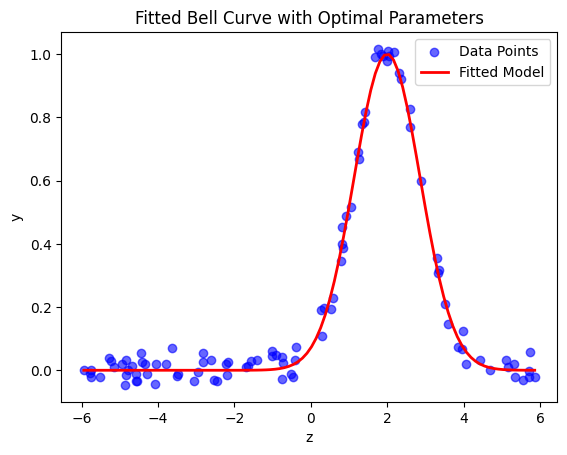

In [10]:
x_start = np.array([2, 5])
alpha = 0.1
optimal_iterates = gradient_descent(gradient, alpha, x_start, z, y)
x_opt = optimal_iterates[-1]  # Get the last iterate as the optimal solution

# Plot
z_plot = np.linspace(min(z), max(z), 100)
y_model = model(z_plot, x_opt)

# Plot the dataset (scatter plot)
plt.scatter(z, y, color='blue', label='Data Points', alpha=0.6)

# Plot the model function (bell curve)
plt.plot(z_plot, y_model, color='red', linewidth=2, label='Fitted Model')

plt.xlabel("z")
plt.ylabel("y")
plt.title("Fitted Bell Curve with Optimal Parameters")
plt.legend()
plt.show()

### 9. Import the second file ‘dataset2.csv’ and store its content into another numpy nd.array

In [11]:
dataset2 = np.loadtxt("dataset2.csv", skiprows=2, delimiter=",")

### 10. Plot this point cloud, with the first column on the x-axis and the second column one the y-axis

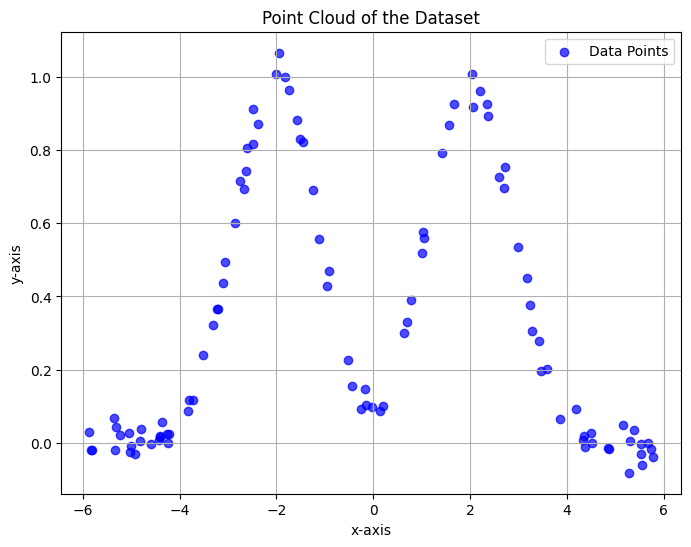

In [12]:
x = dataset2[:, 0]
y = dataset2[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='b', marker='o', alpha=0.7, label="Data Points")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Point Cloud of the Dataset")
plt.legend()
plt.grid(True)
plt.show()

### 11. Run the gradient descent algorithm with step size α= 10 until convergence starting from 3 different initialisation points

In [13]:
z = dataset2[:, 0]
y = dataset2[:, 1]

alpha = 10  

# x = (0, 5)
x_start_1 = np.array([0, 5])
iterates_1 = gradient_descent(gradient, alpha, x_start_1, z, y)
x_opt_1 = iterates_1[-1]
print(f"Final solution: {x_opt_1}")
print(f"Number of iterations: {len(iterates_1)}")

Iteration 0: x = [0. 5.], f(x) = 0.141350, ||∇f(x)|| = 0.018068
Iteration 1: x = [-0.05075808  5.17340398], f(x) = 0.137896, ||∇f(x)|| = 0.017191
Iteration 2: x = [-0.10580895  5.33625589], f(x) = 0.134704, ||∇f(x)|| = 0.016314
Iteration 3: x = [-0.16364607  5.48879932], f(x) = 0.131776, ||∇f(x)|| = 0.015418
Iteration 4: x = [-0.22266339  5.63123589], f(x) = 0.129121, ||∇f(x)|| = 0.014493
Iteration 5: x = [-0.28125896  5.76379695], f(x) = 0.126750, ||∇f(x)|| = 0.013543
Iteration 6: x = [-0.33794099  5.88679761], f(x) = 0.124667, ||∇f(x)|| = 0.012580
Iteration 7: x = [-0.39142096  6.0006668 ], f(x) = 0.122869, ||∇f(x)|| = 0.011624
Iteration 8: x = [-0.44068027  6.10595221], f(x) = 0.121341, ||∇f(x)|| = 0.010697
Iteration 9: x = [-0.48500242  6.20330399], f(x) = 0.120058, ||∇f(x)|| = 0.009820
Iteration 10: x = [-0.52397053  6.29344463], f(x) = 0.118992, ||∇f(x)|| = 0.009013
Iteration 11: x = [-0.55743708  6.37713307], f(x) = 0.118110, ||∇f(x)|| = 0.008288
Iteration 12: x = [-0.58547573  

In [14]:
# x = (-1, 1)
x_start_2 = np.array([-1, 1])
iterates_2 = gradient_descent(gradient, alpha, x_start_2, z, y)
x_opt_2 = iterates_2[-1]
print(f"Final solution: {x_opt_2}")
print(f"Number of iterations: {len(iterates_2)}")

Iteration 0: x = [-1.  1.], f(x) = 0.183954, ||∇f(x)|| = 0.060967
Iteration 1: x = [-1.54185712  1.27944557], f(x) = 0.124786, ||∇f(x)|| = 0.041302
Iteration 2: x = [-1.91885052  1.44815718], f(x) = 0.105393, ||∇f(x)|| = 0.007841
Iteration 3: x = [-1.99226967  1.47567684], f(x) = 0.104768, ||∇f(x)|| = 0.001042
Iteration 4: x = [-1.99705969  1.48492967], f(x) = 0.104759, ||∇f(x)|| = 0.000681
Iteration 5: x = [-1.99681597  1.4917362 ], f(x) = 0.104755, ||∇f(x)|| = 0.000561
Iteration 6: x = [-1.99629732  1.49732053], f(x) = 0.104752, ||∇f(x)|| = 0.000466
Iteration 7: x = [-1.99584168  1.50196009], f(x) = 0.104750, ||∇f(x)|| = 0.000388
Iteration 8: x = [-1.99546035  1.50582609], f(x) = 0.104748, ||∇f(x)|| = 0.000324
Iteration 9: x = [-1.99514213  1.5090531 ], f(x) = 0.104747, ||∇f(x)|| = 0.000271
Iteration 10: x = [-1.99487631  1.5117504 ], f(x) = 0.104747, ||∇f(x)|| = 0.000227
Iteration 11: x = [-1.99465399  1.51400747], f(x) = 0.104746, ||∇f(x)|| = 0.000190
Iteration 12: x = [-1.99446786

In [15]:
# x = (1, 1)
x_start_3 = np.array([1, 1])
iterates_3 = gradient_descent(gradient, alpha, x_start_3, z, y)
x_opt_3 = iterates_3[-1]
print(f"Final solution: {x_opt_3}")
print(f"Number of iterations: {len(iterates_3)}")

Iteration 0: x = [1. 1.], f(x) = 0.199034, ||∇f(x)|| = 0.051213
Iteration 1: x = [1.44872232 1.24682658], f(x) = 0.155002, ||∇f(x)|| = 0.039150
Iteration 2: x = [1.8134169 1.3892095], f(x) = 0.135268, ||∇f(x)|| = 0.013684
Iteration 3: x = [1.93938485 1.44265663], f(x) = 0.133039, ||∇f(x)|| = 0.004559
Iteration 4: x = [1.97269074 1.47378347], f(x) = 0.132816, ||∇f(x)|| = 0.002443
Iteration 5: x = [1.98113611 1.49670587], f(x) = 0.132761, ||∇f(x)|| = 0.001838
Iteration 6: x = [1.98281514 1.51501279], f(x) = 0.132730, ||∇f(x)|| = 0.001509
Iteration 7: x = [1.98268299 1.53010634], f(x) = 0.132709, ||∇f(x)|| = 0.001264
Iteration 8: x = [1.98212288 1.54273257], f(x) = 0.132694, ||∇f(x)|| = 0.001066
Iteration 9: x = [1.98151651 1.55337869], f(x) = 0.132684, ||∇f(x)|| = 0.000904
Iteration 10: x = [1.98096182 1.56240126], f(x) = 0.132676, ||∇f(x)|| = 0.000769
Iteration 11: x = [1.98047701 1.57007655], f(x) = 0.132670, ||∇f(x)|| = 0.000656
Iteration 12: x = [1.98005889 1.576625  ], f(x) = 0.1326

### Results

- $x^{(0)} = (0, 5)$: The Gradient Descent converges to $x = [-0.07314478, 10.60058531]$ after 617 iterations.
- $x^{(0)} = (-1, 1)$: The Gradient Descent converges to $x = [-1.99349903,  1.52575013]$ after 43 iterations.
- $x^{(0)} = (1, 1)$: The Gradient Descent converges to $x = [1.97744344, 1.6170597]$ after 57 iterations.

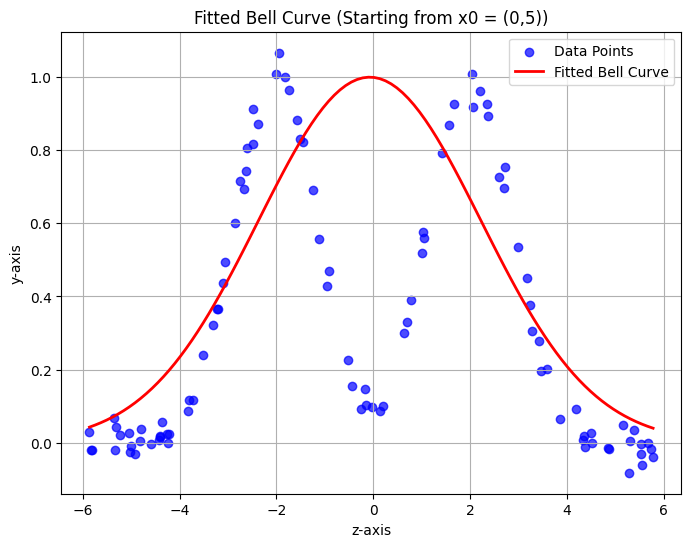

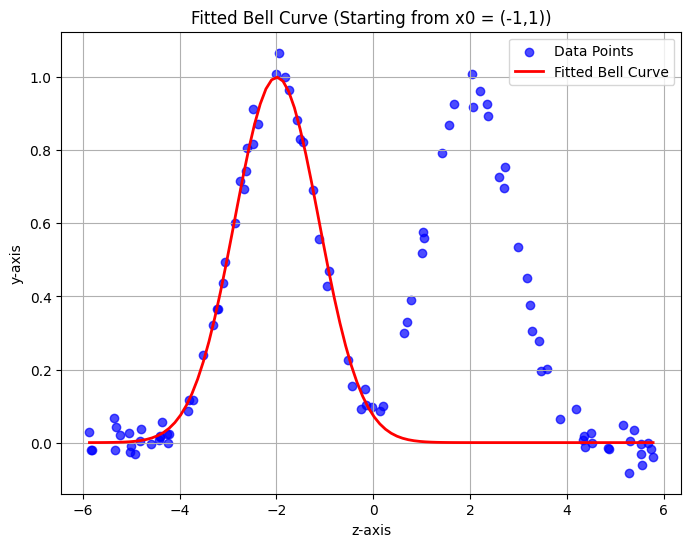

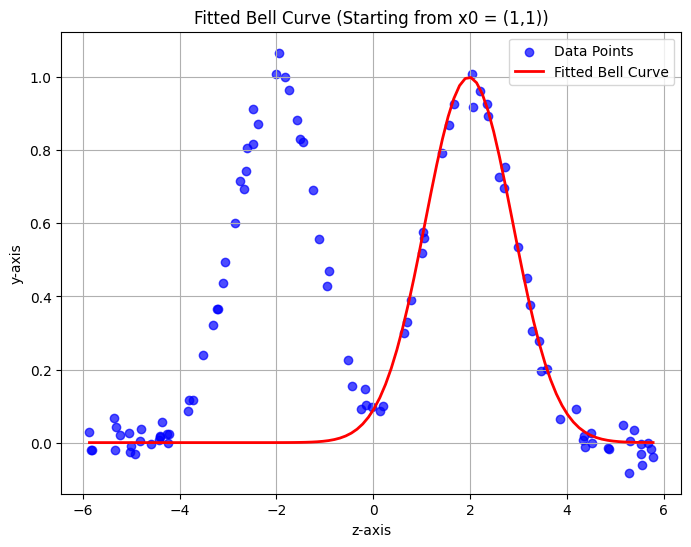

In [16]:
def plot_bell_curve(x_opt, z, y, title):
    z_values = np.linspace(min(z), max(z), 100)
    model_values = model(z_values, x_opt)

    plt.figure(figsize=(8, 6))
    plt.scatter(z, y, color='b', marker='o', alpha=0.7, label="Data Points")
    plt.plot(z_values, model_values, color='r', linewidth=2, label="Fitted Bell Curve")

    plt.xlabel("z-axis")
    plt.ylabel("y-axis")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_bell_curve(x_opt_1, z, y, "Fitted Bell Curve (Starting from x0 = (0,5))")
plot_bell_curve(x_opt_2, z, y, "Fitted Bell Curve (Starting from x0 = (-1,1))")
plot_bell_curve(x_opt_3, z, y, "Fitted Bell Curve (Starting from x0 = (1,1))")

### Comments

We can notice that running the Gradient Descent algorithm on the same dataset from different starting points gives different optimal $x$ solutions.

This happens because Gradient Descent follows the direction of steepest descent, and the starting point determines the path taken to reach a minimum (of the MSE). So, basically:

- The loss function (MSE) is not necessarily convex and, if there are multiple local minimum points, different starting points could lead to different solutions.
- The loss function (MSE) for the model may have regions that are flatter or steeper. A large step size ($α = 10$) can cause the algorithm to take big jumps, potentially skipping some minimum points.
- At each iteration, the gradient $∇f(x)$ points in the direction of steepest descent at that specific $x$. If we start at different $x^{(0)}$, the algorithm follows different paths, possibly leading to different final solutions.

Furthermore, if we take a look at the graphs, we can see that they are different every time in center and width.

Since each run converges to different values $x^* = (x^{*}_1, x^{*}_2)$, the shape of the fitted bell curve changes:

- $x^{*}_1$ affects where the peak of the curve is centered.
- $x^{*}_2$ controls the width (spread) of the bell curve.

### 12. Plot in 3D the surface of the objective function for $x ∈ [−10, 10] × [0.2, 10]$, for the first and the second dataset

The objective function is the mean square error that we aimed to minimize: $ f(x) = \frac{1}{N} \sum_{i=1}^{N} (m(z^{(i)}; x) - y^{(i)})^2 $

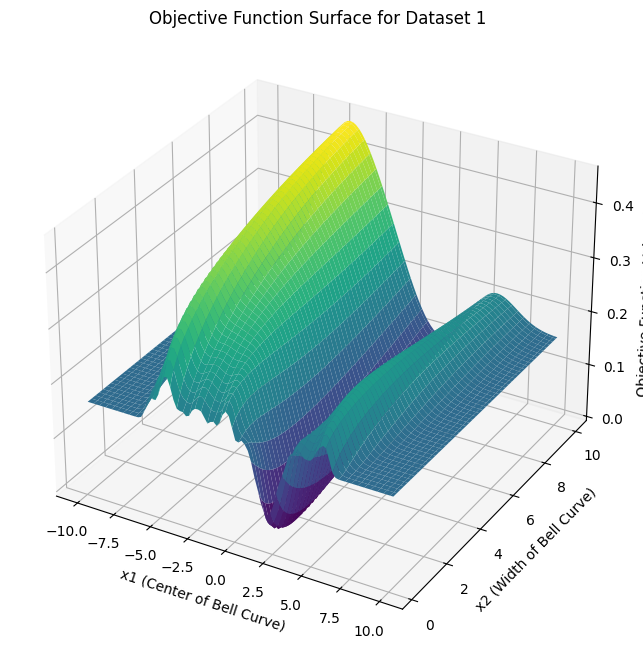

In [17]:
dataset1 = np.loadtxt("dataset1.csv", skiprows=2, delimiter=",")
z1 = dataset1[:, 0]
y1 = dataset1[:, 1]

# Create a mesh grid for x1 and x2 (parameter space)
x1_vals = np.linspace(-10, 10, 100)
x2_vals = np.linspace(0.2, 10, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Compute the objective function for each pair of (x1, x2)
Z = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z[i, j] = compute_f([X1[i, j], X2[i, j]], dataset1)

# Plotting the 3D surface of the objective function for dataset 1
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')

ax.set_xlabel('x1 (Center of Bell Curve)')
ax.set_ylabel('x2 (Width of Bell Curve)')
ax.set_zlabel('Objective Function Value (MSE)')
ax.set_title('Objective Function Surface for Dataset 1')

plt.show()

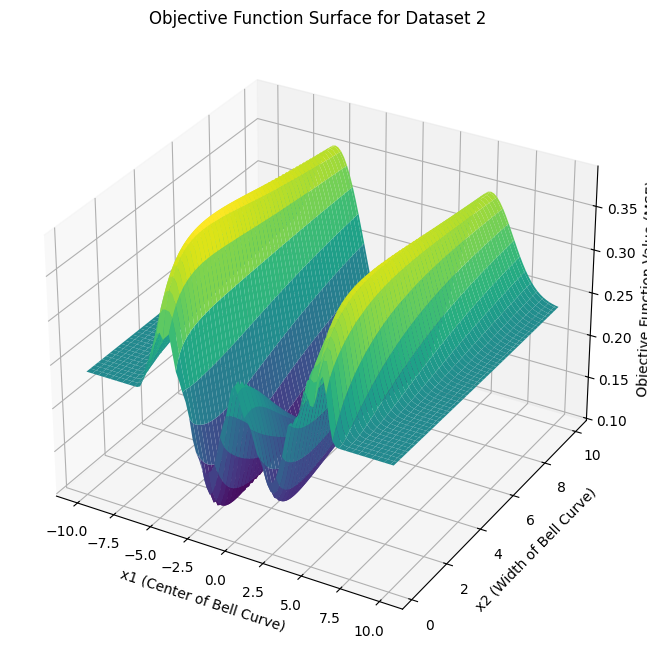

In [18]:
# Load the second dataset
dataset2 = np.loadtxt("dataset2.csv", skiprows=2, delimiter=",")
z2 = dataset2[:, 0]
y2 = dataset2[:, 1]

# Create a mesh grid for x1 and x2 (parameter space)
x1_vals = np.linspace(-10, 10, 100)
x2_vals = np.linspace(0.2, 10, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Compute the objective function for each pair of (x1, x2)
Z = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z[i, j] = compute_f([X1[i, j], X2[i, j]], dataset2)

# Plotting the 3D surface of the objective function for dataset 2
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')

ax.set_xlabel('x1 (Center of Bell Curve)')
ax.set_ylabel('x2 (Width of Bell Curve)')
ax.set_zlabel('Objective Function Value (MSE)')
ax.set_title('Objective Function Surface for Dataset 2')

plt.show()

---

## Problem 2: Newton's Algorithm

We consider the same bivariate function as in Problem 2 of Assignment 2:

$$ f(x) = 100(y − x^2)^2 + (x − 1)^2 $$

Find the minimum of $f$ using Newton’s Method and compare with the results obtained with Gradient Descent, when the algorithms are initialised at $x^{(0)} = (2,2)$. How many iterations does each algorithm need until convergence?

### Newton Method

Newton's method is an iterative optimization algorithm used to find the roots (or zeros, meaning the values of $x$ that make the function equal to zero) of a real valued function. It is often employed in numerical optimization to find local minimum or maximum.

Given a function $f(x)$ and its derivative $f'(x)$, Newton's method updates an initial guess $x_0$ using the formula:

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

The process is repeated iteratively until convergence.

However, if the goal is to use the Newton Method for a minimization problem (like this), we set its gradient to zero: $ \nabla f(x) = 0 $ and the update rule becomes:

$$ x_{n+1} = x_n - \frac{\nabla f(x_n)}{\nabla^2 f(x_n)} $$

Where:

- $\nabla f(x)$ is the first derivative (**gradient**).
- $\nabla^2 f(x)$ is the second derivative (**Hessian** in higher dimensions).

This formula finds the points where the derivative is zero (potential minimum or maximum).


In [19]:
def f2(x1, x2):
    return 100 * (x2 - x1**2)**2 + (x1 - 1)**2

In this multivariate case, the update rule is:

$$ x_{n+1} = x_n - H^{-1}_f ∇f $$

Where $ H^{-1}_f $ is the inverse of the Hessian matrix (second derivative for multivariate function).

In [20]:
# Compute the gradient ∇f at the point x = (x1, x2)
def gradient_f2(x):
    x1, x2 = x
    df_dx1 = -400 * x1 * (x2 - x1**2) + 2 * (x1 - 1)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

# Compute the Hessian matrix (H_f) at the point x = (x1, x2)
def hessian_f2(x):
    x1, x2 = x
    d2f_dx1dx1 = 1200 * x1**2 - 400 * x2 + 2
    d2f_dx1dx2 = -400 * x1
    d2f_dx2dx1 = -400 * x1
    d2f_dx2dx2 = 200
    return np.array([[d2f_dx1dx1, d2f_dx1dx2],
                     [d2f_dx2dx1, d2f_dx2dx2]])

In [21]:
# Compute the Newton's method for minimizing a multivariable function
def newton_method(f, gradient_f, hessian_f, x0, max_iter=1000, tol=1e-6):
    
    x = np.array(x0, dtype=float)
    iteration = 0
    
    for _ in range(max_iter):
        iteration += 1
        grad_x = gradient_f(x)
        hess_x = hessian_f(x)
        
        if np.linalg.norm(grad_x) < tol:
            print(f"Converged in {iteration} iterations.")
            return x
        
        # Check if the hessian is singular (or nearly singular)
        # If the Hessian is singular (det 0), its inverse doesn't exist, and we can't compute the update step.
        # This can happen if the second derivatives are close to zero (very small eigenvalues) and the function has flat regions. Also, if the matrix is ill conditioned (high condition number, meaning large difference in eigenvalue values).
        try:
            hess_inv = np.linalg.inv(hess_x)
        except np.linalg.LinAlgError:
            raise ValueError("Hessian is singular, Newton's method fails.")
        
        x_new = x - hess_inv @ grad_x  # @ is matrix product
        
        if np.linalg.norm(x_new - x) < tol:
            print(f"Converged in {iteration} iterations.")
            return x_new
        
        x = x_new
    
    raise ValueError("Maximum iterations reached, method did not converge.")

In [22]:
# Initial guess x_0 = (2,2)
x0 = np.array([2, 2])

# Newton's method
minimum = newton_method(f2, gradient_f2, hessian_f2, x0)
print("The minimum point is at:", minimum)

Converged in 6 iterations.
The minimum point is at: [1. 1.]


In [23]:
# Gradient descent from the previous assignment
def gradient_descent(f, grad_f, alpha, x_start, max_iter=50000, epsilon=1e-6):
    x = np.array(x_start, dtype=float)
    iterates = [x.copy()]
    
    for i in range(max_iter):
        grad = grad_f(x)  # Compute the gradient
        if np.linalg.norm(grad) < epsilon:
            break
        x = x - alpha * grad  # Gradient descent update
        iterates.append(x.copy())
    
    return iterates

x_start = np.array([2, 2])
alpha = 0.001
iterates = gradient_descent(f2, gradient_f2, alpha, x_start)

print(f"Final solution: {iterates[-1]}")
print(f"Number of iterations: {len(iterates)}")

Final solution: [1.00000112 1.00000224]
Number of iterations: 32274


The results are very interesting:

- Starting from $ x^{(0)} = (2, 2) $, the Newton Method converges in just 6 iterations to the minimum point.
- Starting from $ x^{(0)} = (2, 2) $, the Newton Method converges in 32274 iterations to the minimum point.

In this case, we are dealing with the Rosenbrock function, and we can notice that:

- Gradient descent will struggle because the function has narrow and steep directions (along the x-axis) and flat directions (along the y-axis).
- Newton's method, by using the Hessian, will adjust its steps based on the curvature, and it will make large progress in a few steps, especially in narrow, steep areas.

#### Gradient Descent VS Newton's Method

- Newton’s method converges quadratically, making it a way faster when it's close to a minimum.
- Unlike gradient descent, Newton’s method doesn't require defining a step size (it adjusts it dynamically based on the hessian matrix and the shape of the function).
- If $f(x)$ is convex (like quadratic functions), Newton’s method is very efficient.

However, Newton’s method has some disadvantages:

- It's computationally expensive, since it requires calculating the second derivative ($f''(x)$), which can be hard for complex functions.
- If $f''(x)$ is close to zero, the method can produce huge updates and diverge.
- The gradient descent may converge slower (linear convergence), but it's less expensive since involves calculating only the first derivative.

---

## Problem 3: Newton and Line Search

We consider the bivariate function:

$$ f(x) = 4x^{2}_1 - 3x_1 + x^{2}_2 + 2x_2 $$

### 1. Define a function that computes $ f(x) $ for any $ x = (x1,x2) $ and evaluate it at $ x^{(0)} = (0,0) $

In [24]:
def f3(x):
    x1, x2 = x
    return 4 * x1**2 - 3 * x1 + x2**2 + 2 * x2

# Evaluate f at x0 = (0, 0)
x0 = (0, 0)
result = f3(x0)
print(f"f(0, 0) = {result}")

f(0, 0) = 0


### 2. Define a function that computes the gradient of $f$, $∇f(x)$ for any $x = (x1,x2)$ and evaluate it at $x^{(0)} = (0,0)$

In [25]:
def gradient_f3(x):
    x1, x2 = x
    grad_x1 = 8 * x1 - 3  # Partial derivative with respect to x1
    grad_x2 = 2 * x2 + 2  # Partial derivative with respect to x2
    return np.array([grad_x1, grad_x2])

# Evaluate gradient at x0 = (0, 0)
x0 = (0, 0)
grad_at_x0 = gradient_f3(x0)
print(f"Gradient at (0, 0) = {grad_at_x0}")

Gradient at (0, 0) = [-3  2]


### 3. Define a function that computes the Hessian of $f$, $∇^2f(x)$ for any $x = (x1,x2)$ and evaluate it at $x^{(0)} = (0,0)$

In [26]:
def hessian_f3(x):
    x1, x2 = x
    hess_x11 = 8  # Second partial derivative with respect to x1
    hess_x12 = 0  # Mixed partial derivative
    hess_x21 = 0  # Mixed partial derivative (same as hess_x12)
    hess_x22 = 2  # Second partial derivative with respect to x2
    return np.array([[hess_x11, hess_x12],
                     [hess_x21, hess_x22]])

# Evaluate Hessian at x0 = (0, 0)
x0 = (0, 0)
hess_at_x0 = hessian_f3(x0)
print(f"Hessian at (0, 0) =\n{hess_at_x0}")

Hessian at (0, 0) =
[[8 0]
 [0 2]]


### 4. Compute the Newton’s direction $d_N$ at the point $x^{(0)} = (0,0)$ and check if it is descent direction

The Newton's direction $d_N$ is given by the formula:

$$ - H^{-1}_f ∇f $$

Where again, $H^{-1}_f$ is $∇^2 f(x)$, meaning the Hessian matrix (second derivative for multivariate functions).

A direction is descent if $d^T_N ∇f(x) < 0$.

In [27]:
# Compute Newton's direction: dN = -inv(Hessian) * gradient
def newton_direction(x):
    grad_x = gradient_f3(x)
    hess_x = hessian_f3(x)
    hess_inv = np.linalg.inv(hess_x)
    dN = -hess_inv @ grad_x
    return dN

# Check if it's a descent direction: dN^T * gradient < 0
descent_condition = np.dot(newton_direction(x0), grad_at_x0) < 0

print(f"Newton's direction dN at (0, 0) = {newton_direction(x0)}")
print(f"Is dN a descent direction? {descent_condition}")

Newton's direction dN at (0, 0) = [ 0.375 -1.   ]
Is dN a descent direction? True


In fact, for $x_0 = (0, 0)$, the gradient and Hessian are as follows:

$$
\nabla f(0, 0) = (-3, 2)
$$

$$
\nabla^2 f(0, 0) = \begin{bmatrix} 8 & 0 \\ 0 & 2 \end{bmatrix}
$$

The Newton's direction is computed as:

$$
\mathbf{d}_N = - \left( \begin{bmatrix} 8 & 0 \\ 0 & 2 \end{bmatrix} \right)^{-1} \begin{bmatrix} -3 \\ 2 \end{bmatrix} = \begin{bmatrix} \frac{3}{8} \\ -1 \end{bmatrix}
$$

Finally, we check if 

$$
\mathbf{d}_N^T \nabla f(0, 0) < 0
$$ 

which confirms that it's a descent direction.

### 5. Define a function line search

That computes the value of the line search objective function, in the Newton’s direction for a given (anchor) point $x$ and any step size $α$:

$$ h(α) = f(x+ αdN) $$

In optimization, **line search** is a method used to find an appropriate step size $\alpha$ in the direction of the search (which could be the Newton's direction or any other direction). It is often used to minimize the objective function along a specific search direction.

The general idea of line search is to find the value of $\alpha$ that minimizes the objective function along the search direction. Given an anchor point $x$ and a search direction $\mathbf{d}_N$, we can define the line search objective function $ h(\alpha) = f(x + \alpha \mathbf{d}_N) $.

- $\alpha$ is the step size (a scalar),
- $f(x)$ is the objective function,
- $x$ is the current point,
- $\mathbf{d}_N$ is the search direction (in this case, the Newton's direction).

The goal of the line search is to find the value of $\alpha$ that minimizes the function $h(\alpha)$, which corresponds to minimizing $f(x + \alpha \mathbf{d}_N)$.

In [28]:
# Line search function
def line_search(f, x, dN, alpha):
    x_new = x + alpha * dN  # Compute the new point along the direction dN
    return f(x_new)         # Compute the objective function value at the new point

# Example
x0 = np.array([0, 0])
dN = newton_direction(x0)

# Try a step size alpha
alpha = 0.1
h_alpha = line_search(f3, x0, dN, alpha)

print(f"Value of the line search objective function at alpha = {alpha}: {h_alpha}")

Value of the line search objective function at alpha = 0.1: -0.296875


### 6. Plot the graph of the function $h(α)$ for $α ∈ [0, 2.5]$ and $x = x^{(0)} = (0,0)$

What would be the value of $α$ in exact line search? (give an approximate value using the previous plot).

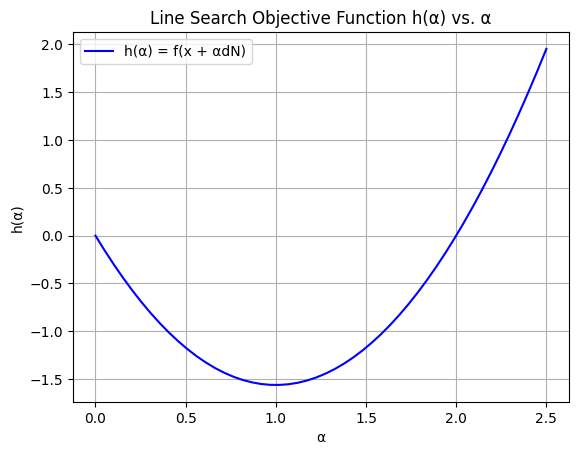

Approximate value of α that minimizes h(α): 1.0


In [29]:
# Create an array of alpha values in the range [0, 2.5] with a step size of 0.1
alpha_values = np.linspace(0, 2.5, 50)

# Compute the corresponding h(alpha) values
h_values = [line_search(f3, x0, dN, alpha) for alpha in alpha_values]

# Plot the function h(alpha)
plt.plot(alpha_values, h_values, label='h(α) = f(x + αdN)', color='b')
plt.xlabel('α')
plt.ylabel('h(α)')
plt.title("Line Search Objective Function h(α) vs. α")
plt.grid(True)
plt.legend()

plt.show()

# Find the approximate value of α that minimizes h(α)
optimal_alpha = alpha_values[np.argmin(h_values)]
print(f"Approximate value of α that minimizes h(α): {round(optimal_alpha, 1)}")

### 7. Wolfe conditions

We now want to find a step size $α$ that verifies the Wolfe conditions. Define a function first_wolfe that compute $ℓ(α)$ defined as

$$ ℓ(α) = f(x^{(0)}) + αη∇f(x^{(0)})^Td_N $$

With relaxation parameter $η = 0.2$.

The **Wolfe conditions** are a two conditions used in line search algorithms to determine an acceptable step size $ \alpha $ that guarantees the algorithm's convergence.

These conditions are important for methods like **Newton's method** and **Gradient Descent**, ensuring that the chosen step size results in sufficient progress along the descent direction.

1. The Armijo Condition (Sufficient Decrease Condition):

   $$ f(x^{(k)} + \alpha d_k) \leq f(x^{(k)}) + \alpha \eta \nabla f(x^{(k)})^T d_k $$

   - $ x^{(k)} $ is the current point,
   - $ d_k $ is the search direction (e.g., Newton's direction $ \mathbf{d}_N $),
   - $ \nabla f(x^{(k)}) $ is the gradient at $ x^{(k)} $,
   - $ \alpha $ is the step size,
   - $ \eta $ (usually a small positive constant like 0.2) is the relaxation parameter.

   The Armijo condition ensures that the function value decreases sufficiently when moving along the search direction. 
   It ensures that $ \alpha $ results in a reduction in the objective function value.

2. The Curvature Condition (Descent Condition):

   $$ \nabla f(x^{(k)} + \alpha d_k)^T d_k \geq \rho \nabla f(x^{(k)})^T d_k $$

   - $ \rho $ (typically around 0.1 to 0.9) is a constant controlling how much curvature is acceptable.

   The Curvature condition ensures that the step size $ \alpha $ results in a sufficient reduction in the gradient along the search direction. It ensures that the new step doesn't go in a direction where the gradient still points significantly along the search direction.
   
   This prevents the method from stepping too far in a "flat" region where further progress is unlikely. 

In [30]:
def first_wolfe(f, x0, gradient_f3, dN, alpha, eta=0.2):
    f_x0 = f3(x0)               # Evaluate the function at the initial point
    grad_at_x0 = gradient_f3(x0)    # Compute the gradient at the initial point
    
    # Compute the first Wolfe condition's ℓ(α)
    l_alpha = f_x0 + alpha * eta * np.dot(grad_at_x0, dN)
    
    return l_alpha

### 8. Plot the graph of $ℓ(α)$ for $α ∈ [0, 2.5]$ on top of the graph of $h(α)$

What would be acceptable values of $α$ according to the first Wolfe conditions? You can give an approximate value given the plot or, optionally, find the value $α∗$ at which $h(α)$ intersects $l(α)$.

Hint: you can use the function fsolve from the package scipy.optimize.

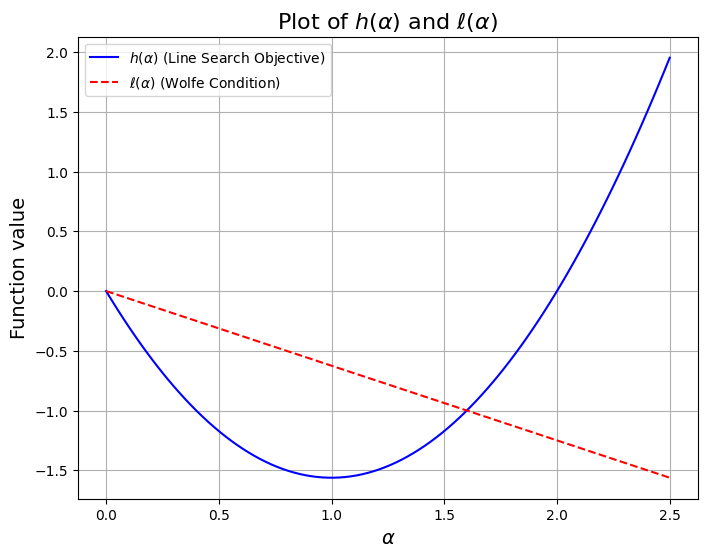

The value of α* where h(α) intersects ℓ(α): 1.5999999999999996


In [31]:
alpha_values = np.linspace(0, 2.5, 100)

# Calculate h(alpha) and l(alpha) for each alpha
h_values = [line_search(f3, x0, dN, alpha) for alpha in alpha_values]
l_values = [first_wolfe(f3, x0, gradient_f3, dN, alpha) for alpha in alpha_values]

# Plot the graphs of h(α) and ℓ(α)
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, h_values, label=r'$h(\alpha)$ (Line Search Objective)', color='blue')
plt.plot(alpha_values, l_values, label=r'$\ell(\alpha)$ (Wolfe Condition)', color='red', linestyle='--')

# Adding labels and title
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Function value', fontsize=14)
plt.title(r'Plot of $h(\alpha)$ and $\ell(\alpha)$', fontsize=16)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Find the value of alpha* where h(alpha) intersects l(alpha) using fsolve
def intersection_eq(alpha):
    return line_search(f3, x0, dN, alpha) - first_wolfe(f3, x0, gradient_f3, dN, alpha)

# Use fsolve to find the intersection point
alpha_star = fsolve(intersection_eq, 1.0)  # Initial guess for alpha
print(f"The value of α* where h(α) intersects ℓ(α): {alpha_star[0]}")

Earlier we found $\alpha = 1.0$ minimizing the function line search. However, $α = 1.59$ is the value that satisfies the first Wolfe condition, which is a better condition for step size selection.

As we said, this value ensures the convergence of the method while preventing overshooting. The first Wolfe condition ensures that the new point doesn't move too far in the direction of the gradient.

### 9. We now consider the second Wolfe condition

$$ ∇f(x^{(0)} + αd_N)^Td_N ≥ \bar{\eta} ∇f(x^{(0)})^Td_N $$

With $ \bar{\eta} = 0.7 $. First explain why this condition is equivalent to:

$$ \frac{\nabla f(x^{(0)} + \alpha d_N)^T d_N}{\nabla f(x^{(0)})^T d_N} \leq \bar{\eta} $$

The second Wolfe condition ensures that the directional derivative of the objective function along the search direction $d_N$ at the new point $x^{(0)} + \alpha d_N$ is at least as large as a fraction (determined by $ \bar{\eta} $) of the directional derivative at the current point $ x^{(0)} $.

This condition can be rewritten as a ratio and this is equivalent to the original condition because:

1. The numerator $ \nabla f(x^{(0)} + \alpha d_N)^T d_N $ represents the directional derivative at the point $ x^{(0)} + \alpha d_N $
2. The denominator $ \nabla f(x^{(0)})^T d_N $ represents the directional derivative at the initial point $ x^{(0)} $

By dividing both sides of the original inequality by $ \nabla f(x^{(0)})^T d_N $, we obtain the ratio form, which is often used in optimization methods for easier computation and interpretation.

- With $≥$ the condition ensures that the directional derivative at the new point is large enough, guaranteeing sufficient progress in the descent direction.
- With $≤$ the condition could be used to enforce a more cautious progress, where we don’t want the objective function to increase too much in the direction of the step.

Second, define a function second_wolfe that compute the ratio $ r(α) = \frac{\nabla f(x^{(0)} + \alpha d_N)^T d_N}{\nabla f(x^{(0)})^T d_N} $ for any $\alpha$.

In [32]:
def second_wolfe(f, x0, gradient_f, dN, alpha):
    grad_at_new_x = gradient_f(x0 + alpha * dN)
    grad_at_x0 = gradient_f(x0)

    numerator = np.dot(grad_at_new_x, dN)
    denominator = np.dot(grad_at_x0, dN)

    return numerator / denominator

### 10. Plot the graph of $r(α)$ for $α ∈ [0, 2.5]$ on top of the graph of $h(α)$ and $ℓ(α)$

What would be the acceptable values of αaccording to both Wolfe conditions? You can give an approximate value given the plot or, optionally, find the value $α∗$ at which $r(α) = \bar{\eta}$

Hint: you can use the function fsolve from the package scipy.optimize.

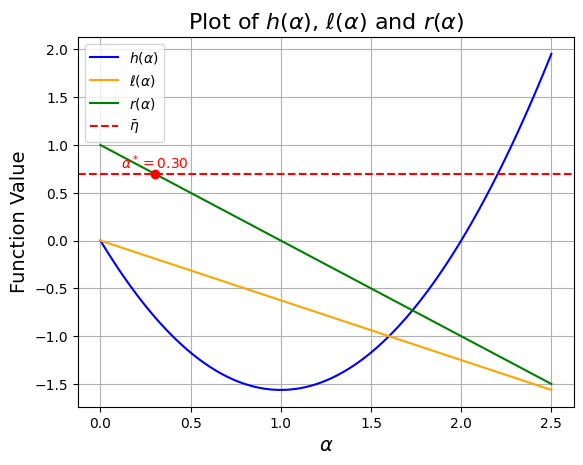

Value of alpha* where r(alpha) = eta_bar: 0.30


In [33]:
alpha_values = np.linspace(0, 2.5, 100)
eta_bar = 0.7

# Calculate the objective function h(alpha) and first Wolfe condition l(alpha) for each alpha
h_values = [line_search(f3, x0, dN, alpha) for alpha in alpha_values]
l_values = [first_wolfe(f3, x0, gradient_f3, dN, alpha) for alpha in alpha_values]

# Calculate the second Wolfe ratio r(alpha) for each alpha
r_values = [second_wolfe(f3, x0, gradient_f3, dN, alpha) for alpha in alpha_values]

# Plot h(alpha), l(alpha), and r(alpha)
plt.plot(alpha_values, h_values, label='$h(\\alpha)$', color='blue')
plt.plot(alpha_values, l_values, label='$\\ell(\\alpha)$', color='orange')
plt.plot(alpha_values, r_values, label='$r(\\alpha)$', color='green')

# Highlight the value of alpha where r(alpha) = eta_bar
plt.axhline(eta_bar, color='red', linestyle='--', label='$\\bar{\\eta}$')

# Find alpha* where r(alpha) = eta_bar using fsolve
def equation(alpha):
    return second_wolfe(f3, x0, gradient_f3, dN, alpha) - eta_bar

alpha_star = fsolve(equation, 1.0)[0]  # Starting guess alpha = 1.0

# Highlight the found alpha*
plt.scatter(alpha_star, eta_bar, color='red', zorder=5)
plt.text(alpha_star, eta_bar + 0.05, f'$\\alpha^* = {alpha_star:.2f}$', color='red', ha='center')

# Labels and title
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('Function Value', fontsize=14)
plt.title('Plot of $h(\\alpha)$, $\\ell(\\alpha)$ and $r(\\alpha)$', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

print(f"Value of alpha* where r(alpha) = eta_bar: {alpha_star:.2f}")

The point where $r(α)$ intersects this dashed line is the value of $α∗$, which satisfies the second Wolfe condition.

Based on the plot, we can visually inspect the region where both Wolfe conditions are satisfied. These are the values of $α$ where $h(α)$ lies below $ℓ(α)$ (first Wolfe condition) and $r(α) ≤ \bar{\eta}$ (second Wolfe condition).

---

In [34]:
print("Optimization Methods SP25 - Assignment 3")
print("Lorenzo Galli - Università della Svizzera Italiana (USI)")

Optimization Methods SP25 - Assignment 3
Lorenzo Galli - Università della Svizzera Italiana (USI)
